Import bibliotekii, wczytanie plików.
Dodanie kolumny stanu.

In [5]:
import pandas as pd
restaurants = pd.read_csv('restaurants.csv')
menu = pd.read_csv('restaurant-menus.csv')
merged = restaurants.merge(menu, how='left', left_on='id', right_on='restaurant_id' , sort=False, suffixes=('_rest', '_menu'))
restaurants['state'] = [str(a).replace(str(b), '').strip()[-3:-1] for a, b in zip(restaurants['full_address'], restaurants['zip_code'])]
restaurants.loc[restaurants['zip_code'].str.len() == 2, ['zip_code']] = '00000'
restaurants.loc[restaurants['zip_code'].isin(['75070']), ['state']] = 'TX'
restaurants.loc[restaurants['state'].isin([', ','an','U']),['state']] = 'PR'
restaurants['state'].unique()
restaurants[restaurants['state']=='']


,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,state
110,111,124,Post Office Pies (Avondale),4.6,32.0,"Pizza, American, Italian",$,NaN,NaN,33.52467,-86.77390,
129,130,100,Urban Cookhouse (Birmingham),4.8,19.0,"American, Sandwich, Salads",NaN,NaN,NaN,33.51668,-86.81039,
143,144,80,Godfather's Pizza (231 State Farm Pkwy),4.9,16.0,"Pizza, American, Italian",$$,NaN,NaN,33.44629,-86.82708,
584,585,35,It's Just Wings (3083 Montgomery Highway),3.7,31.0,"American, Wings",$$,NaN,NaN,31.25078,-85.42848,
899,900,1,Five Guys AL- 4062 5413 US 280,NaN,NaN,"American, Burgers",$,NaN,NaN,33.24693,-86.33891,
...,...,...,...,...,...,...,...,...,...,...,...,...
39274,39275,183,Memo’s tacos,NaN,NaN,"Mexican, Latin American, New Mexican",$$,NaN,NaN,33.00313,-97.22769,
39303,39304,36,"Qdoba (1521 Keller Parkway, Suite 700)",NaN,NaN,"Dinner, Mexican, Burritos, Tacos",$,NaN,NaN,32.93468,-97.21780,
39465,39466,98,Asian Kitchen,NaN,NaN,"Chinese, Asian, Asian Fusion",NaN,NaN,NaN,30.33749,-97.69273,
39629,39630,280,Fish &amp; Rice Poke Bar,NaN,NaN,"Asian, Asian Fusion, Korean",$,NaN,NaN,30.33537,-97.72005,


Import modułu do geolokalizacji (musiałam pobrać dodatkowo przez terminal, komenda jest w dokumentacji Anacondy).  

Funkcja pobierająca dane o stanie na podstawie długości i szerokości geograficznej i przypisująca stan do kolumny "state".

In [6]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
def state_func(row):
    coord = f"{row['lat']}, {row['lng']}"
    location = geolocator.reverse(coord, exactly_one=True)    
    address = location.raw['address']
    state = address.get('state','')
    row['state'] = state
    return row

Zastosowanie funkcji na kopii dataframe'u. Aktualizacja dataframe o nowe dane.
(proces trwa ok. 2 min)

In [7]:
restaurants1 = restaurants[restaurants['state']==''].apply(state_func, axis=1)
restaurants.update(restaurants1)

Nowo dodane stany były w pełnej formie, dlatego zmieniam wszystkie skróty na pełne nazwy w celu ujednolicenia danych.
Moim zdaniem tak się łatwiej pracuje.

In [8]:
restaurants.loc[restaurants['state']=='AL', 'state']='Alabama'
restaurants.loc[restaurants['state']=='WY', 'state']='Wyoming'
restaurants.loc[restaurants['state']=='WI', 'state']='Wisconsin'
restaurants.loc[restaurants['state']=='MN', 'state']='Minnesota'
restaurants.loc[restaurants['state']=='IL', 'state']='Illinois'
restaurants.loc[restaurants['state']=='WV', 'state']='West Virginia'
restaurants.loc[restaurants['state']=='OH', 'state']='Ohio'
restaurants.loc[restaurants['state']=='WA', 'state']='Washington'
restaurants.loc[restaurants['state']=='OR', 'state']='Oregon'
restaurants.loc[restaurants['state']=='PR', 'state']='Puerto Rico'
restaurants.loc[restaurants['state']=='ID', 'state']='Idaho'
restaurants.loc[restaurants['state']=='VA', 'state']='Virginia'
restaurants.loc[restaurants['state']=='DC', 'state']='District of Columbia'
restaurants.loc[restaurants['state']=='MD', 'state']='Maryland'
restaurants.loc[restaurants['state']=='TN', 'state']='Tennessee'
restaurants.loc[restaurants['state']=='VT', 'state']='Vermont'
restaurants.loc[restaurants['state']=='UT', 'state']='Utah'
restaurants.loc[restaurants['state']=='TX', 'state']='Texas'
restaurants.loc[restaurants['state']=='AM', 'state']='Puerto Rico'

In [9]:
restaurants[restaurants['state']=='']

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,state
33181,33182.0,188.0,Andalous Mediterranean Buffet,4.8,17.0,"Mediterranean, Vegetarian, Halal",$,NaN,NaN,32.969460,-96.720821,
33560,33561.0,197.0,Yifang Taiwan Fruit Tea Plano,4.8,38.0,"Asian, Desserts, Juice and Smoothies",NaN,NaN,NaN,33.067590,-96.697640,
33655,33656.0,91.0,OishiSushi &amp; Poke Bowl,4.5,51.0,"Sushi, Asian, Japanese",NaN,NaN,NaN,32.908352,-96.696212,
33796,33797.0,55.0,Torta Shell,5.0,10.0,"Mexican, Tacos, Seafood",NaN,NaN,NaN,32.893470,-96.570020,
34194,34195.0,81.0,Manny's Uptown Tex-Mex,NaN,NaN,"Mexican, Latin American, New Mexican",NaN,NaN,NaN,32.976500,-96.585600,
34344,34345.0,96.0,Taco Villa,NaN,NaN,"Burgers, American, Sandwiches",$$,NaN,NaN,33.522070,-101.956400,
34859,34860.0,209.0,El Chaparral Mexican Restaurant,NaN,NaN,"Mexican, Latin American, New Mexican",$$,NaN,NaN,29.601710,-98.443830,
34892,34893.0,148.0,Dos Jalisco Mexican Restaurant,4.6,135.0,"Mexican, Breakfast and Brunch, Tex Mex, Tacos,...",$,NaN,NaN,29.495040,-98.326160,
34994,34995.0,149.0,"Smoothie King (17910 Bulverde Rd., Suite 107)",4.8,33.0,"American, Healthy, Juice and Smoothies",$$,NaN,NaN,29.604178,-98.418271,
34995,34996.0,148.0,Anchor Bar,4.6,91.0,"Burgers, Wings, Pizza, Sandwiches",NaN,NaN,NaN,29.596090,-98.573870,


Śledztwo googlowe wykazało, ze są to same teksańskie restauracje.

In [10]:
restaurants.loc[restaurants['state']=='', 'state']='Texas'

In [11]:
restaurants['state'].unique()

array(['Alabama', 'Wyoming', 'Wisconsin', 'Minnesota', 'Illinois',
       'West Virginia', 'Ohio', 'Washington', 'Oregon', 'Puerto Rico',
       'Idaho', 'Virginia', 'District of Columbia', 'Maryland',
       'Tennessee', 'Vermont', 'Utah', 'Texas'], dtype=object)

Wyodrębnienie danych dla poszczególnych kategorii cenowych.

In [12]:
cheap = restaurants[restaurants['price_range']=='$']
moderate = restaurants[restaurants['price_range']=='$$']
expensive = restaurants[(restaurants['price_range']=='$$$') + (restaurants['price_range']=='$$$$')]

Ile jest tanich restauracji w poszczególny stanach?

In [13]:
cheapsy = cheap.groupby('state', as_index=False)['price_range'].count()
#zmiana nazwy na unikatową
cheapsy.rename(columns = {'price_range': 'cheap #'}, inplace=True)
cheapsy

,state,cheap #
0,Alabama,646
1,District of Columbia,779
2,Idaho,15
3,Illinois,141
4,Maryland,529
5,Minnesota,23
6,Ohio,5
7,Oregon,583
8,Puerto Rico,145
9,Tennessee,30


Ile jest restauracji o umiarkowanych cenach?

In [14]:
moderasy = moderate.groupby('state', as_index=False)['price_range'].count()
#zmiana nazwy na unikatową
moderasy.rename(columns = {'price_range': 'moderate #'}, inplace=True)
moderasy

,state,moderate #
0,Alabama,302
1,District of Columbia,299
2,Idaho,8
3,Illinois,43
4,Maryland,177
5,Minnesota,16
6,Ohio,10
7,Oregon,122
8,Puerto Rico,14
9,Tennessee,9


Ile jest drogich restauracji?

In [15]:
expensy = expensive.groupby('state', as_index=False)['price_range'].count()
#zmiana nazwy na unikatową
expensy.rename(columns = {'price_range': 'expensive #'}, inplace=True)
expensy

,state,expensive #
0,Alabama,6
1,District of Columbia,26
2,Maryland,7
3,Oregon,4
4,Texas,20
5,Utah,2
6,Virginia,45
7,Washington,48
8,West Virginia,2
9,Wisconsin,7


Połączenie wszystkich kategorii w tabelę całościową i wyliczenie wartości całkowitej (tj. ile jest restauracji z zakresem cen w danym stanie)

In [16]:
#nie ma mozliwosci łączenia wielu dataframeów na raz, więc robię to stopniowo
chm = cheapsy.merge(moderasy, how='outer', on ='state')
all = chm.merge(expensy, how='outer', on ='state')

#usuniecie wartosci NaN
all = all.fillna(0)
#nowa kolumna total
all['total'] = all['cheap #'] + all['moderate #'] + all['expensive #']
all

,state,cheap #,moderate #,expensive #,total
0,Alabama,646,302,6.0,954.0
1,District of Columbia,779,299,26.0,1104.0
2,Idaho,15,8,0.0,23.0
3,Illinois,141,43,0.0,184.0
4,Maryland,529,177,7.0,713.0
5,Minnesota,23,16,0.0,39.0
6,Ohio,5,10,0.0,15.0
7,Oregon,583,122,4.0,709.0
8,Puerto Rico,145,14,0.0,159.0
9,Tennessee,30,9,0.0,39.0


Ile procentowo stanowią określone kategorie cenowe w konkretnych stanach?

In [17]:
all['cheap #'] = all['cheap #'] / all['total'] * 100
all.rename(columns = {'cheap #': 'cheap %'}, inplace=True)
all['moderate #'] = all['moderate #'] / all['total'] * 100
all.rename(columns = {'moderate #': 'moderate %'}, inplace=True)
all['expensive #'] = all['expensive #'] / all['total'] * 100
all.rename(columns = {'expensive #': 'expensive %'}, inplace=True)


In [18]:
#zaokrąglenie do dwóch miejsc po przecinku
all = all.round(2)

In [19]:
all

,state,cheap %,moderate %,expensive %,total
0,Alabama,67.71,31.66,0.63,954.0
1,District of Columbia,70.56,27.08,2.36,1104.0
2,Idaho,65.22,34.78,0.00,23.0
3,Illinois,76.63,23.37,0.00,184.0
4,Maryland,74.19,24.82,0.98,713.0
5,Minnesota,58.97,41.03,0.00,39.0
6,Ohio,33.33,66.67,0.00,15.0
7,Oregon,82.23,17.21,0.56,709.0
8,Puerto Rico,91.19,8.81,0.00,159.0
9,Tennessee,76.92,23.08,0.00,39.0


Usunięcie rekordów ponizej 50 restauracji.

In [20]:

all1 = all.drop(2)
all1 = all1.drop(5)
all1 = all1.drop(6)
all1 = all1.drop(9)

In [21]:
all1

,state,cheap %,moderate %,expensive %,total
0,Alabama,67.71,31.66,0.63,954.0
1,District of Columbia,70.56,27.08,2.36,1104.0
3,Illinois,76.63,23.37,0.00,184.0
4,Maryland,74.19,24.82,0.98,713.0
7,Oregon,82.23,17.21,0.56,709.0
8,Puerto Rico,91.19,8.81,0.00,159.0
10,Texas,71.22,28.44,0.34,5851.0
11,Utah,77.63,22.29,0.08,2566.0
12,Vermont,27.88,72.12,0.00,330.0
13,Virginia,80.50,18.94,0.56,8031.0


In [26]:
all1 = all1.reset_index(drop=True)

In [27]:
all1

,state,cheap %,moderate %,expensive %,total
0,Alabama,67.71,31.66,0.63,954.0
1,District of Columbia,70.56,27.08,2.36,1104.0
2,Illinois,76.63,23.37,0.00,184.0
3,Maryland,74.19,24.82,0.98,713.0
4,Oregon,82.23,17.21,0.56,709.0
5,Puerto Rico,91.19,8.81,0.00,159.0
6,Texas,71.22,28.44,0.34,5851.0
7,Utah,77.63,22.29,0.08,2566.0
8,Vermont,27.88,72.12,0.00,330.0
9,Virginia,80.50,18.94,0.56,8031.0


Co nam dają te informacje?  
Mozna załozyc, ze otworzenie drogiej restauracji w stanie, w ktorym jest znaczna przewaga restauracji tanich   
(np. VA: na prawie 8k restauracji ponad 80% stanowią tanie restauracje) nie miałoby większego sensu.  


Lepszym pomysłem byłby stan, w którym mamy do czynienia z nizszym stosunkiem restauracji o niskim  
zakresie cenowym i pojedyncze drogie restauracje: np. WI, WV, VT.   


Zrobić wykres słupkowy stany na x i średnia linia




Ile procentowo stanowią poszczególne kategorie cenowe (bez podziału na stany)??

In [23]:

df = restaurants.value_counts('price_range').rename_axis('price_range').to_frame('total')
#df.loc[df['price_range']=='$$$$', 'price_range']=='$$$$$'
df['sum'] = df['total'].sum()
df['sum'] = df['total'] / df['sum'] * 100
df = df.rename(columns={'sum': '%'})
df = df.round(2)
df



,total,%
price_range,,
$,24385,72.62
$$,9029,26.89
$$$,149,0.44
$$$$,18,0.05


In [24]:
restaurants.to_csv('plik.csv')

In [46]:
import matplotlib.pylab as plt
import seaborn as sns


In [47]:
alltoplot = all1.drop("total", axis='columns')

In [48]:
alltoplot

,state,cheap %,moderate %,expensive %
0,Alabama,67.71,31.66,0.63
1,District of Columbia,70.56,27.08,2.36
2,Illinois,76.63,23.37,0.00
3,Maryland,74.19,24.82,0.98
4,Oregon,82.23,17.21,0.56
5,Puerto Rico,91.19,8.81,0.00
6,Texas,71.22,28.44,0.34
7,Utah,77.63,22.29,0.08
8,Vermont,27.88,72.12,0.00
9,Virginia,80.50,18.94,0.56


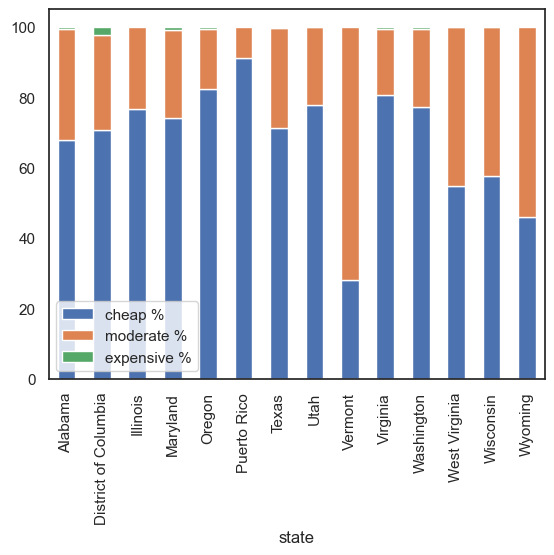

In [49]:
alltoplot.plot(x="state", kind = 'bar', stacked=True, mark_right=True);